# Bank Marketing Classification

In this part of the assignment we want to do a classification task using PyTorch on bank marketing dataset.

#Import Library

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import DataLoader, TensorDataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
path = '/content/drive/MyDrive/bank-full.csv'
df = pd.read_csv(path, sep=';')

In [29]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [30]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if col != 'y':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [31]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,yes
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,yes
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,yes
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,no


#Load Dataset
Here, you should download and load the dataset. After that, you should split train dataset to train and validation sets. Finally, define the dataloaders for `train`, `validation` and `test`

In [32]:
#TODO
train_ratio = 0.65
validation_ratio = 0.15
test_ratio = 0.2

train_df, temp_df = train_test_split(df, test_size=(1 - train_ratio))

val_df, test_df = train_test_split(temp_df, test_size=(test_ratio / (test_ratio + validation_ratio)))

print(f'Train dataset size: {len(train_df)}')
print(f'Validation dataset size: {len(val_df)}')
print(f'Test dataset size: {len(test_df)}')

Train dataset size: 29387
Validation dataset size: 6781
Test dataset size: 9043


#Normalize data
normalize numerical data.

In [33]:
# Normalize numerical data
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
val_df[numerical_cols] = scaler.transform(val_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

In [34]:
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7040,0.096161,1.737602,-1.920198,-0.302192,-0.136172,-0.333369,0.898880,-0.436274,1.517879,1.469263,0.828132,-0.622284,0.395779,-0.41142,-0.29959,0.44447,no
8144,-0.655157,-1.021644,-1.920198,-0.302192,-0.136172,-0.329852,0.898880,-0.436274,1.517879,-1.653891,0.163768,0.214749,-0.244241,-0.41142,-0.29959,0.44447,no
35647,1.504883,0.204688,-1.920198,-0.302192,-0.136172,-0.108239,0.898880,-0.436274,-0.712249,-0.933163,0.828132,-0.358773,-0.564251,-0.41142,-0.29959,0.44447,no
10485,-0.185583,1.431019,1.363127,-0.302192,-0.136172,-0.381337,-1.112495,2.292135,1.517879,0.027808,0.163768,1.935316,-0.244241,-0.41142,-0.29959,0.44447,no
31161,-0.655157,0.817853,1.363127,1.031020,-0.136172,-0.409159,-1.112495,-0.436274,-0.712249,1.229021,-0.832778,-0.300646,-0.564251,-0.41142,-0.29959,0.44447,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36104,-0.655157,1.431019,-0.278536,-0.302192,-0.136172,-0.093529,0.898880,-0.436274,-0.712249,-0.572799,0.828132,0.784396,-0.564251,-0.41142,-0.29959,0.44447,no
36350,0.096161,-1.021644,-0.278536,-0.302192,-0.136172,0.543806,0.898880,2.292135,-0.712249,-0.572799,0.828132,0.664267,-0.244241,-0.41142,-0.29959,0.44447,no
27617,-0.467327,-1.328226,1.363127,-0.302192,-0.136172,-0.437300,0.898880,-0.436274,-0.712249,0.628414,1.160315,-0.459527,-0.244241,-0.41142,-0.29959,0.44447,no
27375,-0.467327,-1.021644,-0.278536,-0.302192,-0.136172,0.607124,0.898880,-0.436274,-0.712249,0.628414,1.160315,-0.633909,-0.564251,-0.41142,-0.29959,0.44447,no


# Create Data Loader
create data loader for pytorch

In [35]:
#TODO

batch_size = 64

def df_to_tensors(dataframe):
    labels = dataframe['y'].apply(lambda x: 1 if x == 'yes' else 0)
    labels = torch.tensor(labels.values, dtype=torch.long)
    features_df = dataframe.drop(columns=['y'])

    features = torch.tensor(features_df.values, dtype=torch.float32)
    return features, labels

train_features, train_labels = df_to_tensors(train_df)
val_features, val_labels = df_to_tensors(val_df)
test_features, test_labels = df_to_tensors(test_df)

train_dataset = TensorDataset(train_features, train_labels)
val_dataset = TensorDataset(val_features, val_labels)
test_dataset = TensorDataset(test_features, test_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

print(f'Train loader length: {len(train_loader)}')
print(f'Validation loader length: {len(val_loader)}')
print(f'Test loader length: {len(test_loader)}')

Train loader length: 460
Validation loader length: 106
Test loader length: 142


#Model
define your model in here

In [36]:
class BankMarketingNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BankMarketingNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

#Train your model
Define `criterion` and `optimizer`.
Train your model

Tasks:
- [ ] Things that are needed to be printed in each epoch:
  - Number of epoch
  - Train loss
  - Validation loss
- [ ] save train/validation loss (of each epoch) in an array for later usage

In [39]:
input_size = len(train_df.columns) - 1
hidden_size = 64
output_size = 1
model = BankMarketingNet(input_size, hidden_size, output_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_losses = []
val_losses = []

In [40]:
#TODO
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss = train_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels.float())
            val_loss += loss.item() * inputs.size(0)

    val_loss = val_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

print('Training complete.')


Epoch [1/20], Train Loss: 0.3311, Validation Loss: 0.2470
Epoch [2/20], Train Loss: 0.2469, Validation Loss: 0.2382
Epoch [3/20], Train Loss: 0.2397, Validation Loss: 0.2342
Epoch [4/20], Train Loss: 0.2355, Validation Loss: 0.2328
Epoch [5/20], Train Loss: 0.2330, Validation Loss: 0.2311
Epoch [6/20], Train Loss: 0.2311, Validation Loss: 0.2305
Epoch [7/20], Train Loss: 0.2296, Validation Loss: 0.2302
Epoch [8/20], Train Loss: 0.2285, Validation Loss: 0.2307
Epoch [9/20], Train Loss: 0.2276, Validation Loss: 0.2290
Epoch [10/20], Train Loss: 0.2269, Validation Loss: 0.2291
Epoch [11/20], Train Loss: 0.2262, Validation Loss: 0.2282
Epoch [12/20], Train Loss: 0.2257, Validation Loss: 0.2284
Epoch [13/20], Train Loss: 0.2250, Validation Loss: 0.2272
Epoch [14/20], Train Loss: 0.2245, Validation Loss: 0.2295
Epoch [15/20], Train Loss: 0.2239, Validation Loss: 0.2279
Epoch [16/20], Train Loss: 0.2234, Validation Loss: 0.2276
Epoch [17/20], Train Loss: 0.2231, Validation Loss: 0.2279
Epoch 

### Visualize Loss plot

Using the arrays that you have (from previous task in the above section), visualize Loss plot (train and validation together)

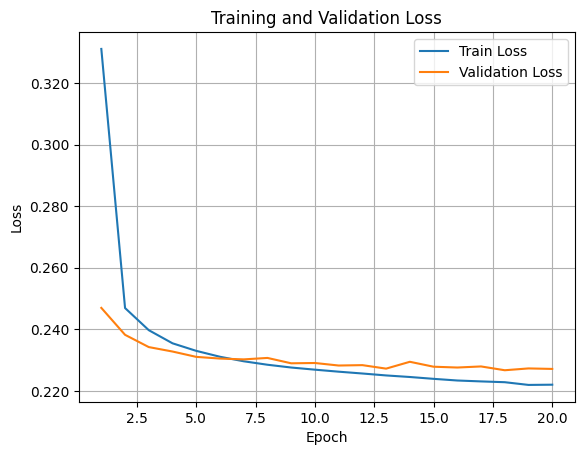

In [43]:
#TODO
from matplotlib.ticker import FormatStrFormatter

plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.show()

## Evaluation

Test your trained model (using the Test Dataloader that you have).

In [54]:
#TODO
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predictions = (outputs > 0.5).int().flatten()
        total += len(inputs)
        correct += (predictions == labels).sum()

accuracy = correct / total
print(f'Test Accuracy: {accuracy:.2%}')

Test Accuracy: 90.20%
